<a href="https://colab.research.google.com/github/Datamogorov/Machine-Learning-projects/blob/master/NNpractice_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project puts into practise the fundamentals of deep learning. We created a model based on NN using two layers of 10 neurons each and different activation functions to predict the class of an image. The dataset is the one contained in the Keras package in which different images of numbers written by hand are analyzed using the vector form represented by matrix pixels.
This example was reproduced from the book of Jordi Torres (Deep learning)
Preparing working environment

In [12]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print("GPU Available: ", tf.test.is_gpu_available())
print(tf.keras.__version__)

2.2.0
GPU Available:  True
2.3.0-tf


Loadindg data MNIST(Keras has preloaded data: MNIST loaded as four NumPy arrays )

In [0]:

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

To prove if the data is well loaded, we are goint to choose whichever of the images in the MNIST dataset
let's say the image number 4

9


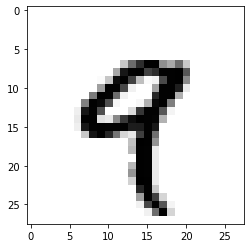

In [14]:

plt.imshow(x_train[4], cmap= plt.cm.binary)
#To see the corresponding label
print(y_train[4])

Let's use NumPy to know moe about the data

In [15]:

#dimensions
print(x_train.ndim)
#forma
print(x_train.shape)
#datatype
print(x_train.dtype)

3
(60000, 28, 28)
uint8


To manipulate the tensor. Select digit between 1 to 99 and put them in another tensor.

In [16]:

my_slice = x_train[1:100:,:]
print(my_slice.shape)
#to select pixels 14 X 14 in the right down corner of each image 
#my_slice = x_train[:, 14:, 14:]
# to cut a pixel space of 14 X 14 in the middle of the image
#my_slice = x_train[:, 7:-7, 7:-7]

(99, 28, 28)


Preprocessing data is a common steap to adapt data to a proper format which allows to harness the NN performance. The most common preprocessing operations are:
vectorization, Normalization and Feature extracion.
For example, to handle data in a range between 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


To change the tensor shape without changing the data. the function numpy,reshape can convert each image of the MNIST dataset to vectors of 784 components

In [18]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


To use the labels (0-9) we use a one-hot codification.To turn the labels in a vector to a vector with as many zeros as distinct label numbers, we can use a kera's function named to_categorical 

In [0]:
from tensorflow.keras.utils import to_categorical

Let's check the label without to_categorical function

In [20]:
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(y_test.shape)

7
5
(60000,)
(10000,)


Now with categorical

In [21]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes=10)
print(y_test[0])
#print(y_train[0])
print(y_train.shape)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(60000, 10)


Definning the model
The model is consider a sequence of layers (keras has all kind of layers and can be approached easily into the model)


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation = 'sigmoid', input_shape = (784,)))
model.add(Dense(10, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Configuration of the learning process

In [0]:
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics=['accuracy'])

Model training

In [29]:
model.fit(x_train, y_train, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5913 - accuracy: 0.8645
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5406 - accuracy: 0.8725
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5033 - accuracy: 0.8781
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4744 - accuracy: 0.8829
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4513 - accuracy: 0.8874
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4322 - accuracy: 0.8908
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4162 - accuracy: 0.8938
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4024 - accuracy: 0.8963


Model testing

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3854 - accuracy: 0.9002


In [31]:
print("Test Accuracy:", test_acc)

Test Accuracy: 0.9002000093460083


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

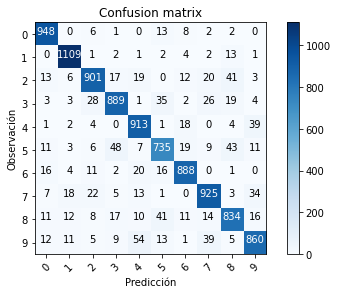

In [34]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

GENERACION DE PREDICCIONES

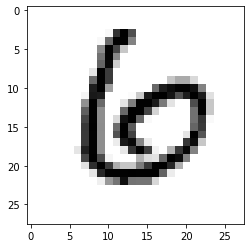

In [36]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [0]:
predictions = model.predict(x_test)

In [53]:
np.argmax(predictions[11])

6

In [54]:
print(predictions[11])

[0.05412151 0.00753369 0.1062267  0.00324012 0.03051595 0.07528365
 0.6212554  0.00087932 0.09600192 0.00494185]


In [41]:
np.sum(predictions[11])

1.0000001